In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df_train = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_train.csv')
df_val = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_val.csv')

In [3]:
df_train

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2


In [4]:
df_train.groupby("Label").describe()

Data                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2809  প্রেমেণ্ট ভিসা নিশ্চিত হওয়ার পরে , অগ্রীম কোনো...    3
1      5133   4986  আমি কাউকে শুধু ধন্যবাদ দিতে চাই না , এতটুকু বল...    3
2      4548   4350  কুত্তারবাচ্ছা , তোর জন্মই ত পতিতালয়ে । তা না হ...    3

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [7]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [8]:
df_train.columns

Index(['Data', 'Label'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["classes_bin"] = lb_make.fit_transform(df_train["Label"])
df_val["classes_bin"] = lb_make.fit_transform(df_val["Label"])
df_train[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,2,Positive
1,0,Negative
2,2,Positive
3,2,Positive
4,1,Neutral
5,1,Neutral
6,0,Negative
7,2,Positive
8,1,Neutral
9,1,Neutral


In [10]:
df_train

,Data,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভাল লেগেছে,Positive,2
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,Positive,2
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,Negative,0
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative,0


In [11]:
df_train.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
Negative      4548.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral       2894.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Positive      5133.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [13]:
df_train['Data'] = df_train['Data'].astype(str)
df_val['Data'] = df_val['Data'].astype(str)

In [14]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [15]:
df_train['Data'] = df_train['Data'].apply(clean_text)
df_val['Data'] = df_val['Data'].apply(clean_text)

In [16]:
df_train.dropna(inplace=True)

In [17]:
df_train

,Data,Label,classes_bin
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো ত...,Positive,2
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায...,Negative,0
2,ভাই আপনার কথাই যাদু রয়েছে,Positive,2
3,উওরটা আমার অনেক ভাল লেগেছে,Positive,2
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ...,Neutral,1
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চ...,Positive,2
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,Negative,0
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,Positive,2
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,Negative,0


In [18]:
train_text = df_train["Data"]
test_text= df_val["Data"]

In [19]:
train_counts = count_vect.fit_transform(train_text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(12575, 3134)

In [20]:
test_counts = count_vect.transform(test_text) # converting docs into vectors
test_tfidf  = test_counts 
test_tfidf = tfidf_transformer.transform(test_counts) # converting transformed vectors into tf-idf vectors
test_tfidf.shape

(1567, 3134)

In [21]:
X_train = train_tfidf
X_test = test_tfidf

y_train = df_train['classes_bin']
y_test = df_val["classes_bin"]

In [22]:
Y_pre = df_train['Label']
target_names = list(set(Y_pre))

In [23]:
target_names

['Negative', 'Neutral', 'Positive']

In [24]:
X_train

<12575x3134 sparse matrix of type '<class 'numpy.float64'>'
	with 88128 stored elements in Compressed Sparse Row format>

In [25]:
y_train

0        2
1        0
2        2
3        2
4        1
        ..
12570    2
12571    0
12572    2
12573    0
12574    0
Name: classes_bin, Length: 12575, dtype: int32

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [27]:
import seaborn as sn

# Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.5781748564135291
              precision    recall  f1-score   support

    Negative       0.61      0.66      0.64       590
     Neutral       0.52      0.06      0.11       354
    Positive       0.55      0.79      0.65       623

    accuracy                           0.58      1567
   macro avg       0.56      0.51      0.47      1567
weighted avg       0.57      0.58      0.52      1567



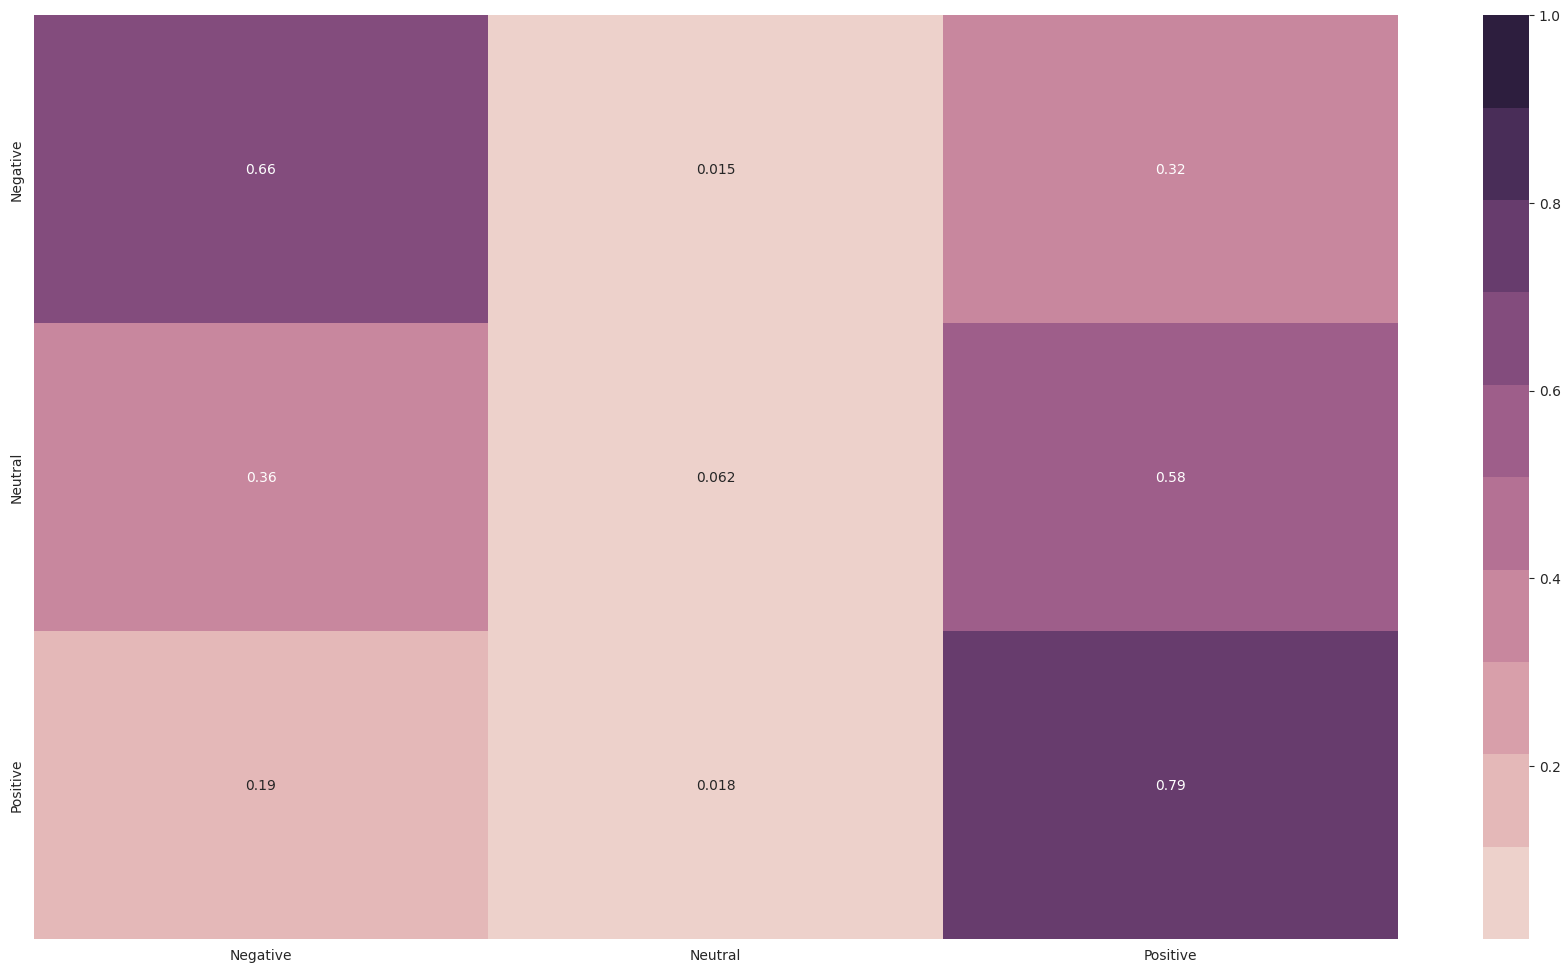

In [29]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [30]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [31]:
from sklearn.svm import SVC


Test set accuracy 0.6260370134014039
              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68       590
     Neutral       0.54      0.25      0.35       354
    Positive       0.64      0.74      0.68       623

    accuracy                           0.63      1567
   macro avg       0.60      0.57      0.57      1567
weighted avg       0.61      0.63      0.61      1567



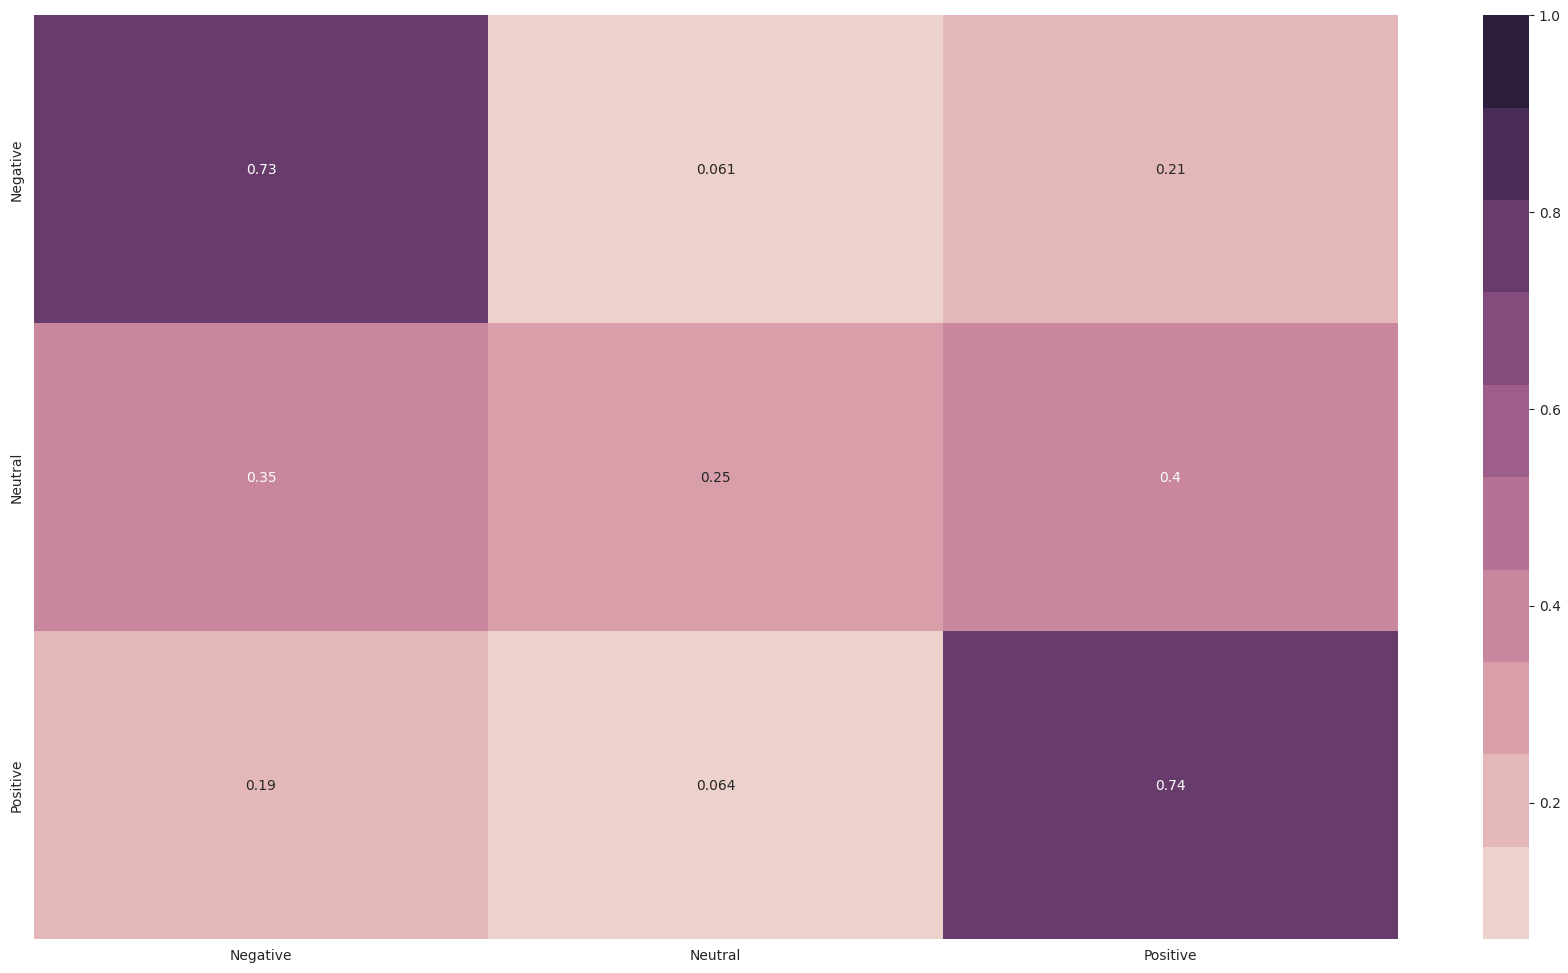

In [32]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [33]:
from xgboost import XGBClassifier

Test set accuracy 0.5813656668793874
              precision    recall  f1-score   support

    Negative       0.59      0.72      0.65       590
     Neutral       0.37      0.17      0.23       354
    Positive       0.63      0.68      0.65       623

    accuracy                           0.58      1567
   macro avg       0.53      0.52      0.51      1567
weighted avg       0.55      0.58      0.56      1567



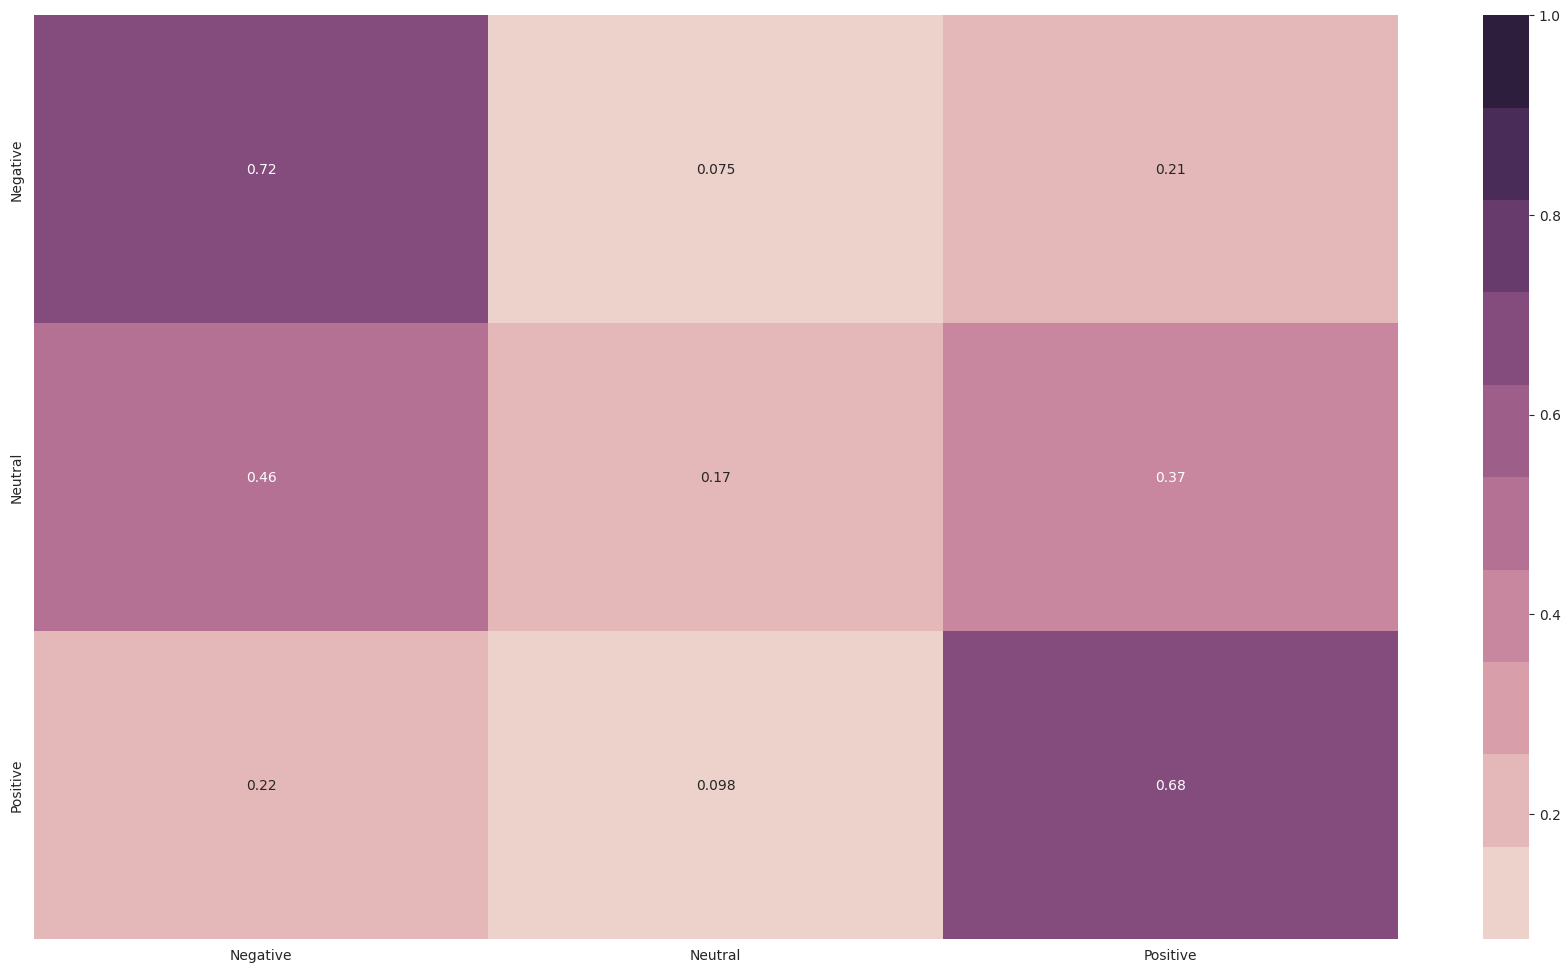

In [34]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.6388002552648373
              precision    recall  f1-score   support

    Negative       0.66      0.74      0.70       590
     Neutral       0.56      0.30      0.39       354
    Positive       0.64      0.74      0.69       623

    accuracy                           0.64      1567
   macro avg       0.62      0.59      0.59      1567
weighted avg       0.63      0.64      0.62      1567



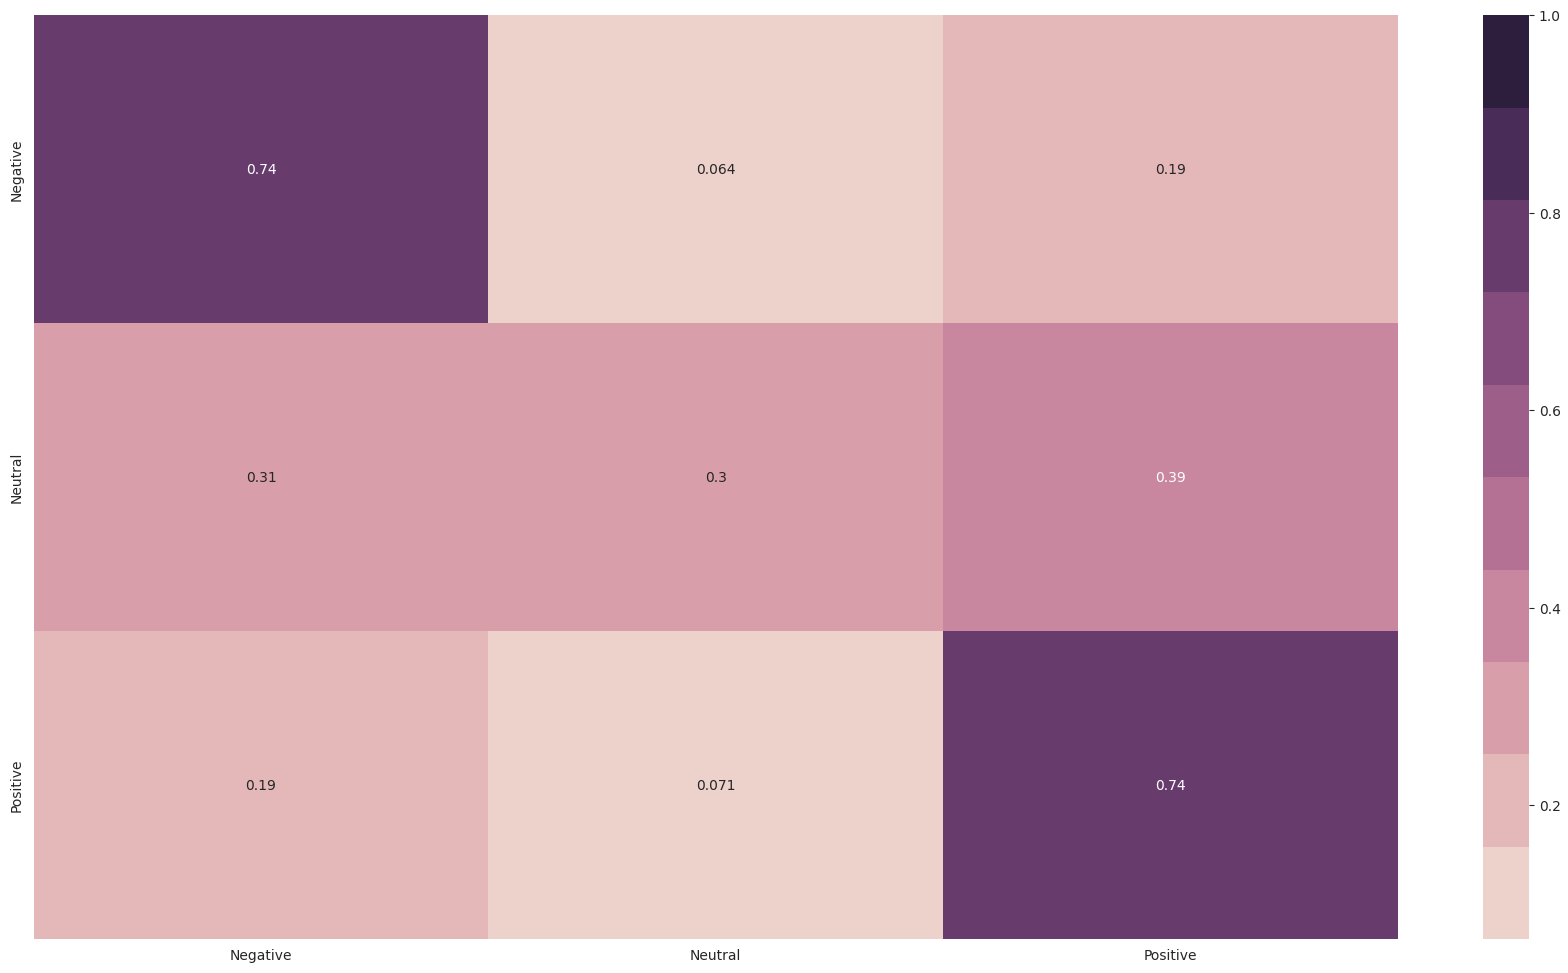

In [36]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  